In [ ]:
!pip install dm-pybloom
!pip install bitarray

     |████████████████████████████████| 88 kB 6.0 MB/s 
  Created wheel for bitarray: filename=bitarray-2.3.4-cp37-cp37m-linux_x86_64.whl size=171972 sha256=2c01071a81d44223acded9006a37a0d0e0022b38449539c8299b93420a1737b2
  Stored in directory: /root/.cache/pip/wheels/84/cc/5b/0e861bdb5294d22d2d4f595df936f964a95258387e11494d41
Successfully built bitarray


In [ ]:
!curl https://www.mit.edu/~ecprice/wordlist.10000 -o words.txt
!ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75880  100 75880    0     0   155k      0 --:--:-- --:--:-- --:--:--  155k
total 80
drwxr-xr-x 1 root root  4096 May 26 13:48 sample_data
-rw-r--r-- 1 root root 75880 May 30 17:56 words.txt


In [ ]:
from random import shuffle, choice
import numpy as np
import matplotlib.pyplot as plt
from pybloom import BloomFilter

def testBF(n, p, iterations):
    # words to be added 
    all_words = list()
    with open("words.txt",encoding='utf-8-sig') as f:
      for line in f:
        all_words.append(line.rstrip())
    
    total_words = len( all_words)

    shuffle(all_words) 
    # first n element
    word_present= all_words[:n]

    bloomf =  BloomFilter(capacity=n, error_rate=p)
    #print("Nbr elements: {}".format(bloomf.capacity)) 
    #print("Size of bit array: {}".format(bloomf.num_bits)) 
    #print("Number of hash functions: {}".format(bloomf.num_slices))
    #print("False positive Probability:{}%".format(100*bloomf.error_rate))
    
     # given M = num_bits, k = num_slices, P = error_rate, n = capacity
      
    for item in word_present: 
        bloomf.add(item) 

    FP=0
    TN=0
    TT=0

    #conjunto
    words_set = word_present
    for i in range(iterations):
      some_index = choice(range(total_words))
      some_word = all_words[ some_index ]
      if some_word not in words_set:
        TN = TN + 1
        if some_word in bloomf:
          FP = FP + 1
        TT = TT + 1
    return FP/TT

In [ ]:
from random import shuffle, choice
import numpy as np
import matplotlib.pyplot as plt
from pybloom import ScalableBloomFilter

def testSBF(n, p, initial_size, iterations,mode):
    
     # words to be added 
    all_words = list()
    with open("words.txt",encoding='utf-8-sig') as f:
      for line in f:
        all_words.append(line.rstrip())
    
    total_words = len( all_words)

    shuffle(all_words) 
    # first n element
    word_present= all_words[:n]
   
    bloomf = ScalableBloomFilter(initial_capacity=initial_size, error_rate=p, mode=mode)
    #print("Mode: {}".format(bloomf.scale))
    #print("ratio: {}".format(bloomf.ratio))
    #print("initial_capacity: {}".format(bloomf.initial_capacity))
    #print("False positive Probability:{}%".format(100*bloomf.error_rate))
    

     # given M = num_bits, k = num_slices, P = error_rate, n = capacity
    for item in word_present: 
      bloomf.add(item) 
    #print("Actual_capacity: {}".format(bloomf.capacity))

    FP=0
    TN=0
    TT=0

    #conjunto
    words_set = word_present
    for i in range(iterations):
      some_index = choice(range(total_words))
      some_word = all_words[ some_index ]
      if some_word not in words_set:
        TN = TN + 1
        if some_word in bloomf:
          FP = FP + 1
        TT = TT + 1

    return FP/TT 

In [ ]:
from pybloom import ScalableBloomFilter

resultado_final = {}
elementos = [56,128,256,1024,2048]
taxa_erros = [0.01,0.02,0.05,0.1]

for rate_error in taxa_erros:
  all_errors = np.zeros((5,6))
  all_errors[0][0]=elementos[0]
  all_errors[1][0]=elementos[1]
  all_errors[2][0]=elementos[2]
  all_errors[3][0]=elementos[3]
  all_errors[4][0]=elementos[4]

  j = -1
  for elem in elementos:
    #print("Bloom Filter")
    
    j=j+1
    erro =[]
    for i in range(100): 
      erro.append(testBF(n = elem,p = rate_error,iterations = 5000))
    #print("Average FP rate: {}%".format(100*sum(erro)/len(erro))) 
    all_errors[j][1]=round(100*sum(erro)/len(erro), 2)
    #print("\n")

    #print("Scalable Bloom Filter SMALL_SET_GROWTH inicial 100")
    erro =[]
    for i in range(100):  
      erro.append(testSBF(n = elem,p = rate_error,initial_size = 100,iterations = 5000, mode=ScalableBloomFilter.SMALL_SET_GROWTH))
    #print("Average FP rate: {}%".format(100*sum(erro)/len(erro))) 
    all_errors[j][2]=round(100*sum(erro)/len(erro), 2)

    #print("Scalable Bloom Filter LARGE_SET_GROWTH inicial 100") 
    for i in range(100): 
      erro.append(testSBF(n = elem,p = rate_error,initial_size = 100,iterations = 5000, mode=ScalableBloomFilter.LARGE_SET_GROWTH))
    #print("Average FP rate: {}%".format(100*sum(erro)/len(erro))) 
    all_errors[j][3]=round(100*sum(erro)/len(erro), 2)
    #print("\n")
    #print("Scalable Bloom Filter SMALL_SET_GROWTH inicial 200")
    erro =[]
    for i in range(100):  
      erro.append(testSBF(n = elem,p = rate_error,initial_size = 200,iterations = 5000, mode=ScalableBloomFilter.SMALL_SET_GROWTH))
    #print("Average FP rate: {}%".format(100*sum(erro)/len(erro))) 
    all_errors[j][4]=round(100*sum(erro)/len(erro), 2)
    #print("\n")

    #print("Scalable Bloom Filter LARGE_SET_GROWTH inicial 200") 
    for i in range(101): 
      erro.append(testSBF(n = elem,p = rate_error,initial_size = 200,iterations = 5000, mode=ScalableBloomFilter.LARGE_SET_GROWTH))
    #print("Average FP rate: {}%".format(100*sum(erro)/len(erro))) 
    all_errors[j][5]=round(100*sum(erro)/len(erro), 2)

  resultado_final[rate_error] = all_errors


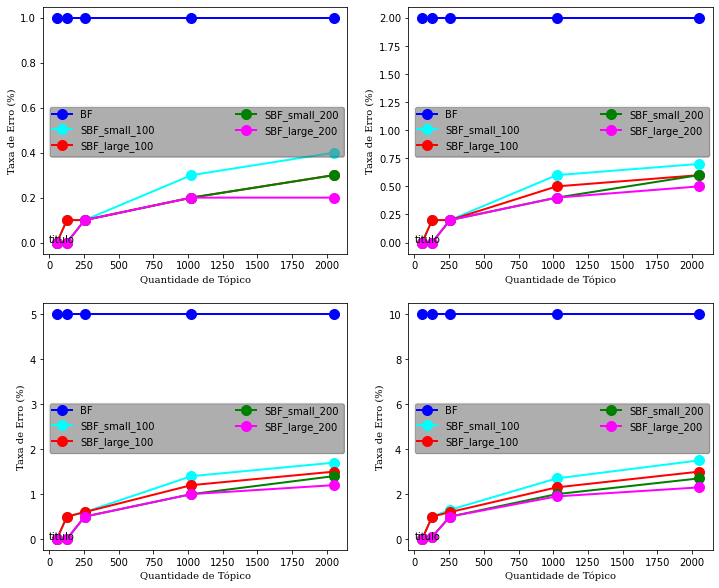

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath

labels = ['BF',
    'SBF_small_100',
    'SBF_large_100',
    'SBF_small_200',
    'SBF_large_200']

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }
ID_fig = 221

plt.figure(figsize=(12, 10))

for error_rate in resultado_final:
  plt.subplot(ID_fig)
  all_errors = resultado_final[error_rate]
  
  plt.plot(all_errors[:,0], all_errors[:,1].round(),  label =labels[0], linewidth=2, color='blue', marker='o', markerfacecolor='blue', markersize=10)
  plt.plot(all_errors[:,0], all_errors[:,2].round(1), label =labels[1], linewidth=2, color='cyan', marker='o', markerfacecolor='cyan', markersize=10)
  plt.plot(all_errors[:,0], all_errors[:,3].round(1), label =labels[2], linewidth=2, color='red', marker='o', markerfacecolor='red', markersize=10)
  plt.plot(all_errors[:,0], all_errors[:,4].round(1), label =labels[3], linewidth=2, color='green', marker='o', markerfacecolor='green', markersize=10 )
  plt.plot(all_errors[:,0], all_errors[:,5].round(1), label =labels[4], linewidth=2, color='magenta', marker='o', markerfacecolor='magenta', markersize=10)
  titulo = 'Erro Predito: ' +str(error_rate*100)+'%'

  plt.text(0,0,'titulo')

  plt.ylabel('Taxa de Erro (%)', fontdict=font)
  plt.ylabel('Taxa de Erro (%)', fontdict=font)
  plt.xlabel('Quantidade de Tópico', fontdict=font)
  leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True, )
  leg.get_frame().set_alpha(0.1)
  ID_fig=ID_fig+1
plt.show()

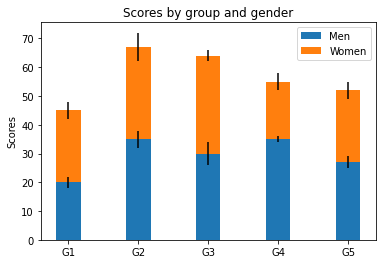

In [ ]:
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()